In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [4]:
moviesdf = pd.read_csv("D:\\Movie recommendation\\Movie-recommendation\\data\\movies.csv",index_col=None)
ratingsdf = pd.read_csv("D:\\Movie recommendation\\Movie-recommendation\\data\\ratings.csv",index_col=None)

In [5]:
moviesdf.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratingsdf.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
df = ratingsdf.merge(moviesdf, on='movieId', how='left')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [9]:
unique_count = df['movieId'].nunique()
print("Number of unique movies:", unique_count)
unique_count = df['userId'].nunique()
print("Number of unique records:", unique_count)

Number of unique movies: 9724
Number of unique records: 610


In [10]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [11]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [12]:
eda_df=df
eda_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


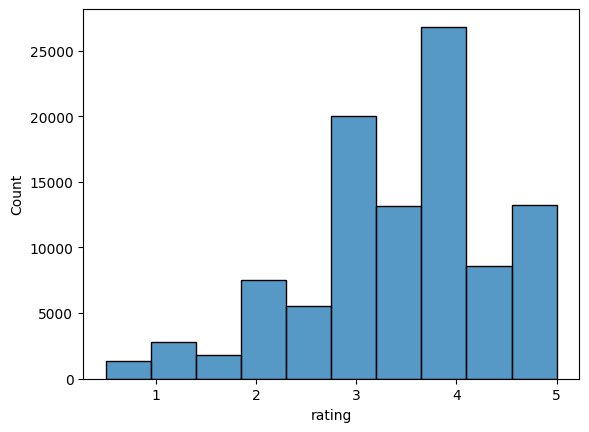

In [13]:
sns.histplot(data=eda_df,x='rating',bins=10)
plt.show()

In [14]:
eda_df['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [15]:
eda_df['rating'] = np.ceil(eda_df['rating'])
eda_df['rating'].value_counts()

rating
4.0    39954
3.0    25597
5.0    21762
2.0     9342
1.0     4181
Name: count, dtype: int64

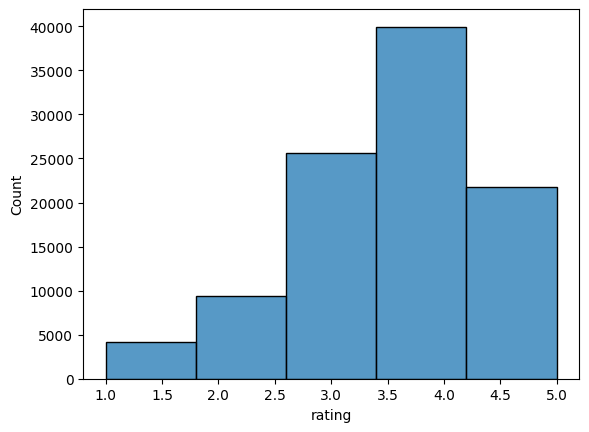

In [16]:
sns.histplot(data=eda_df,x='rating',bins=5)
plt.show()

In [17]:
eda_df['timestamp'] = pd.to_datetime(eda_df['timestamp'], unit='s')

eda_df['year'] = eda_df['timestamp'].dt.year
eda_df['month'] = eda_df['timestamp'].dt.month

eda_df.head()

,userId,movieId,rating,timestamp,title,genres,year,month
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000,7
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,2000,7
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,2000,7
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2000,7
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2000,7


In [18]:
df['Movie_Release_Year']=df['title'].str.extract(r'\((\d{4})\)$')
                                                 
unique_movies_df=df.groupby('title')['Movie_Release_Year'].agg(unique_movie_title='first', Movie_Release_Year='max').reset_index()
unique_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9719 entries, 0 to 9718
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               9719 non-null   object
 1   unique_movie_title  9695 non-null   object
 2   Movie_Release_Year  9695 non-null   object
dtypes: object(3)
memory usage: 227.9+ KB


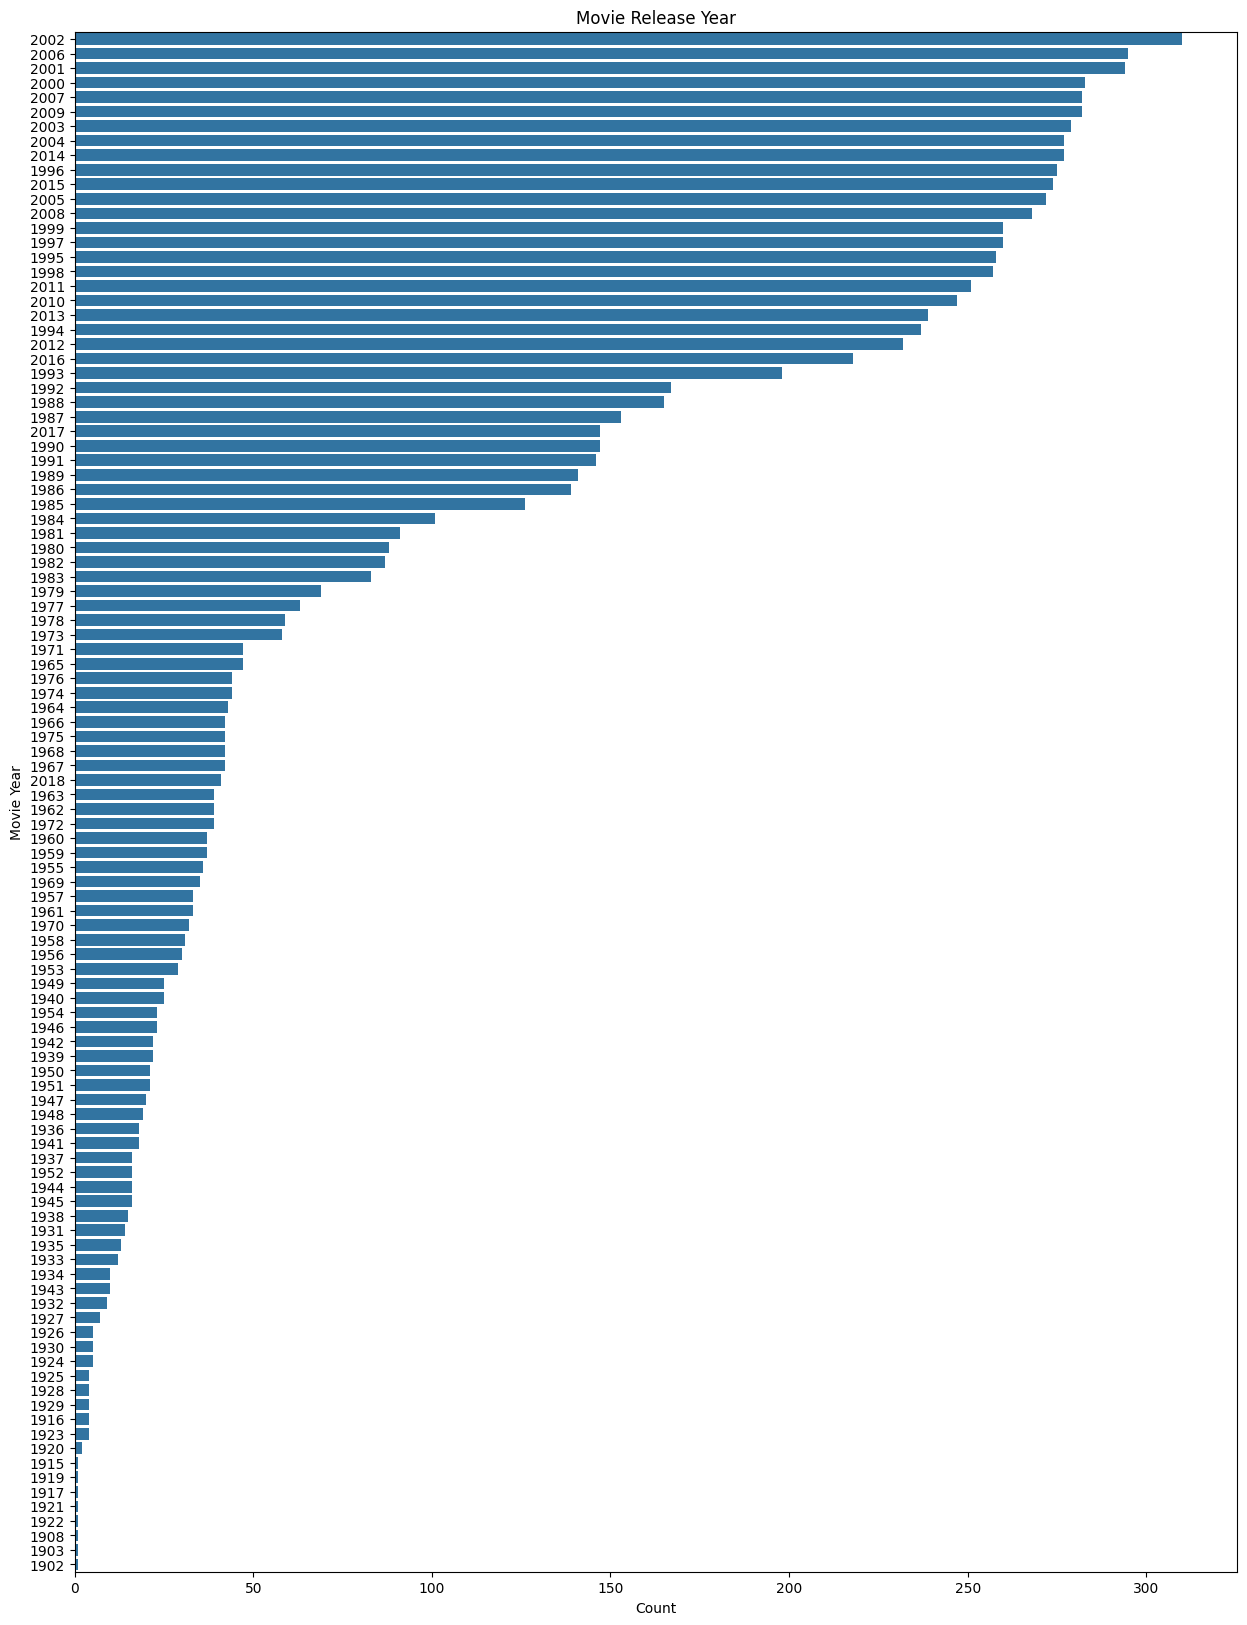

In [19]:
plt.figure(figsize=(15, 20))
sns.countplot(data=unique_movies_df, y='Movie_Release_Year', orient='h', order=unique_movies_df['Movie_Release_Year'].value_counts().index)

plt.xlabel('Count')
plt.ylabel('Movie Year')
plt.title('Movie Release Year')

plt.show()

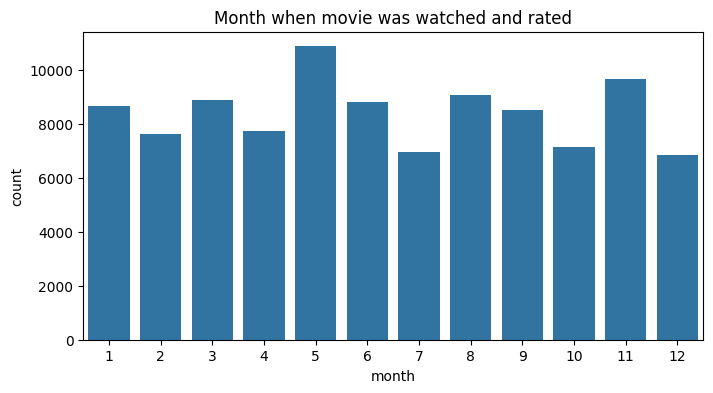

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(data=eda_df,x='month')
plt.title('Month when movie was watched and rated')
plt.show()

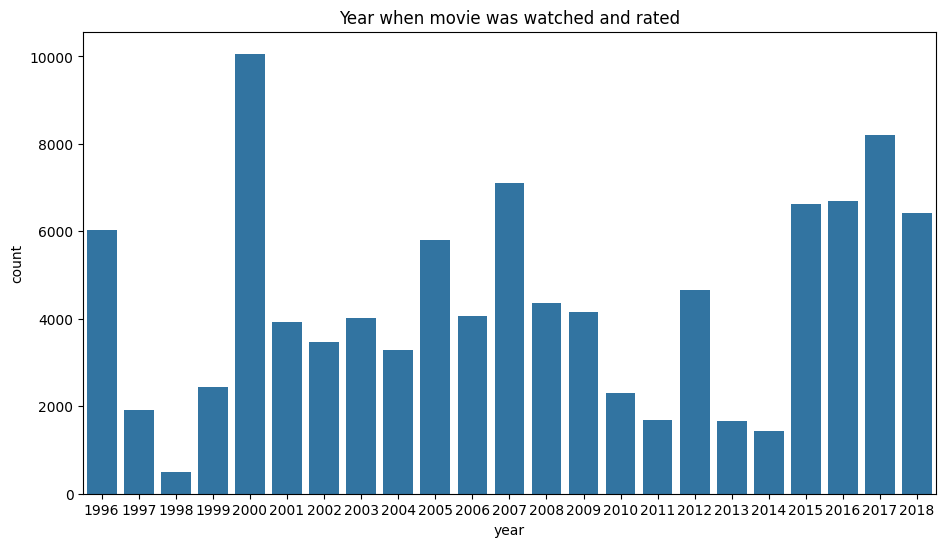

In [21]:
plt.figure(figsize=(11,6))
sns.countplot(data=eda_df,x='year')
plt.title('Year when movie was watched and rated')
plt.show()

In [22]:
eda_df['genres'].value_counts()

genres
Comedy                                                      7196
Drama                                                       6291
Comedy|Romance                                              3967
Comedy|Drama|Romance                                        3000
Comedy|Drama                                                2851
                                                            ... 
Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi       1
Children|Fantasy|Musical|Romance                               1
Comedy|Crime|Drama|Horror                                      1
Comedy|Sci-Fi|War                                              1
Action|Crime|Drama|Sci-Fi                                      1
Name: count, Length: 951, dtype: int64

In [23]:
genre_counts=eda_df['genres'].value_counts()
top_20_genres=genre_counts.head(20)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17804\3829675550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_20_genres.index, y=top_20_genres.values, palette='viridis')


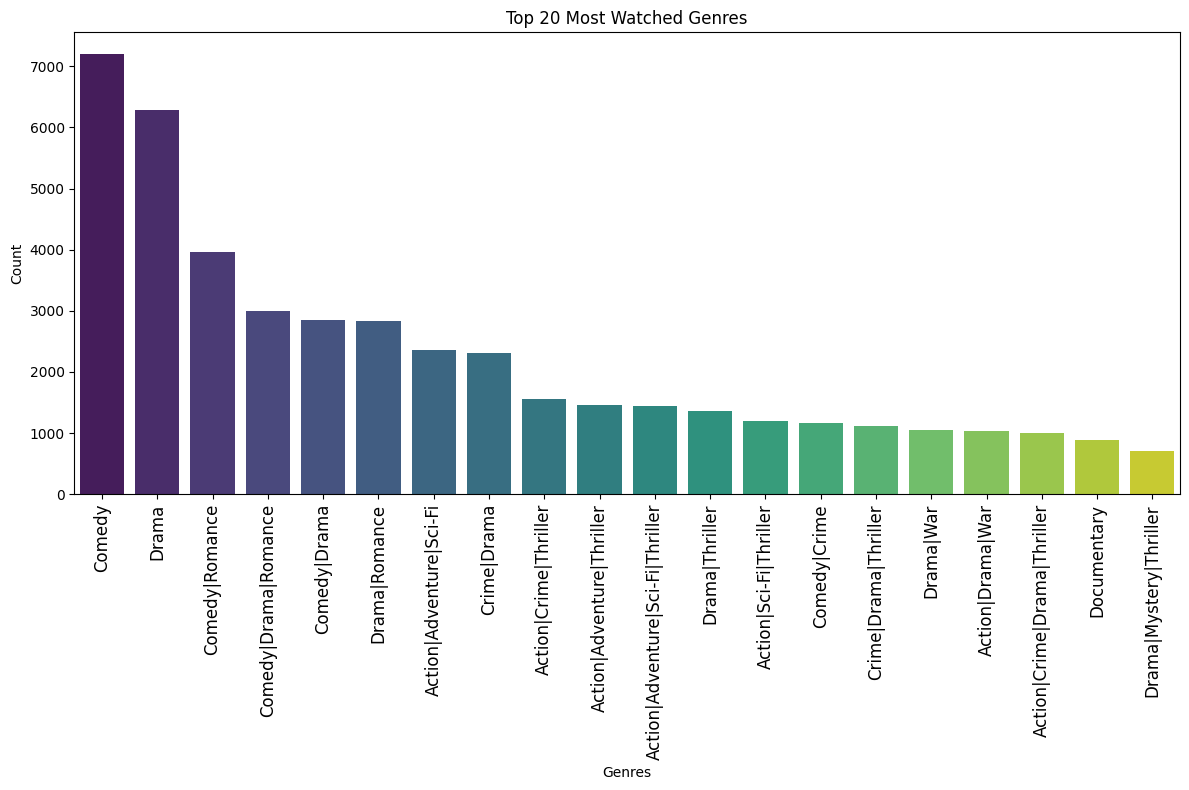

In [24]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_20_genres.index, y=top_20_genres.values, palette='viridis')

plt.xticks(rotation=90, fontsize=12)  

plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 20 Most Watched Genres')

plt.tight_layout()
plt.show()

In [28]:
title_counts=eda_df['title'].value_counts()
top_20_titles=title_counts.head(20)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17804\3282187973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_20_titles.values, y=top_20_titles.index, palette='viridis')


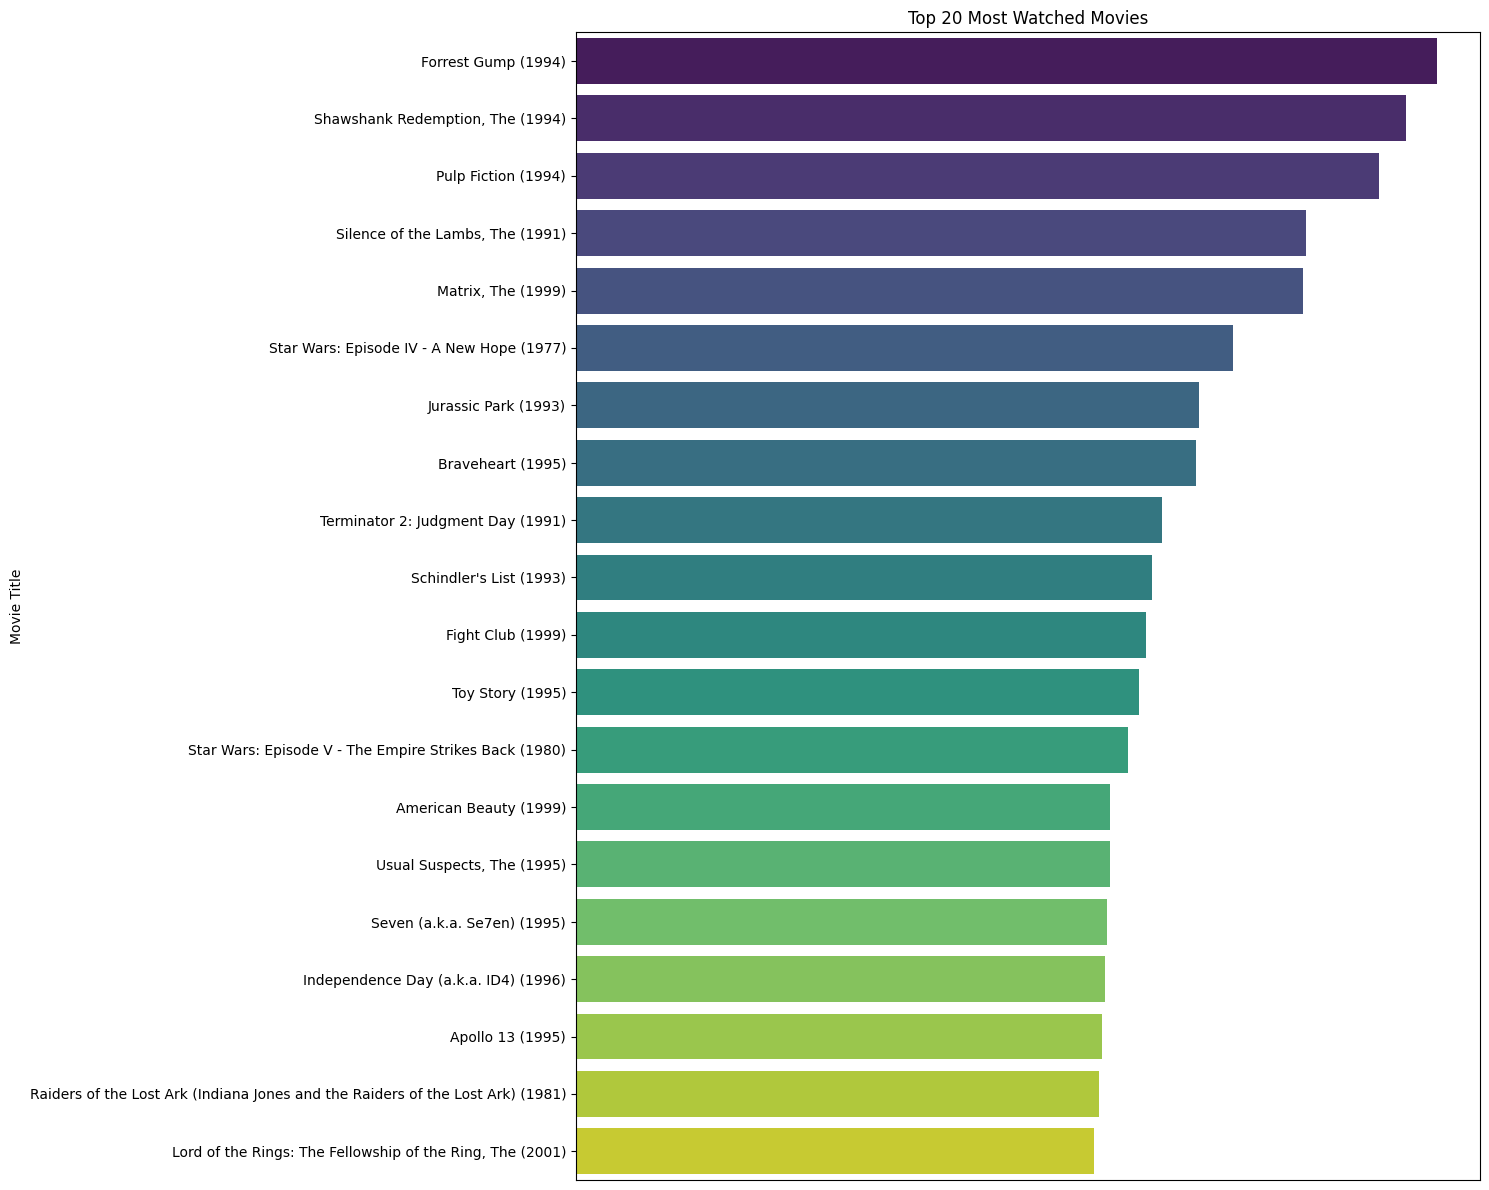

In [29]:
plt.figure(figsize=(15, 12))
ax = sns.barplot(x=top_20_titles.values, y=top_20_titles.index, palette='viridis')  

ax.set_xticks([])

plt.ylabel('Movie Title')  
plt.title('Top 20 Most Watched Movies')

plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17804\2117497468.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_N_movies, x='count', y='title', palette='viridis')


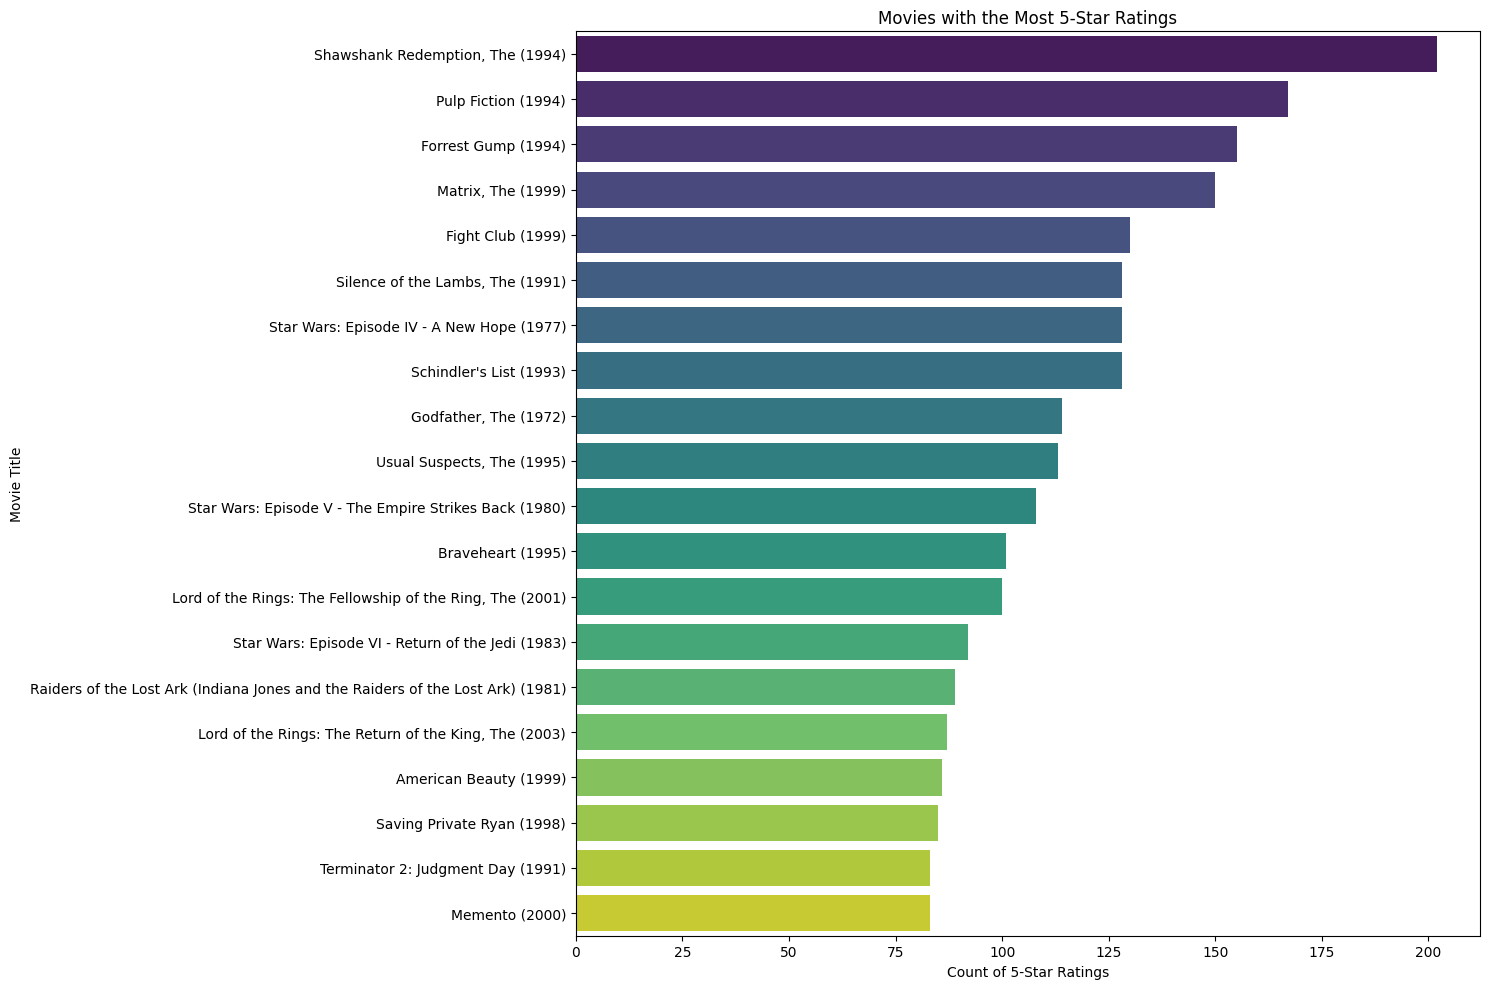

In [30]:
# Filter rows where the rating is 5
five_star_ratings = eda_df[eda_df['rating'] == 5]

# Group movies and count the occurrences of 5-star ratings
top_movies = five_star_ratings['title'].value_counts().reset_index()
top_movies.columns = ['title', 'count']

# Sort the movies by count of 5-star ratings in descending order
top_movies = top_movies.sort_values(by='count', ascending=False)

# Select the top N movies with the most 5-star ratings (e.g., top 20)
top_N_movies = top_movies.head(20)

# Create a bar plot to visualize the results
plt.figure(figsize=(15, 10))
sns.barplot(data=top_N_movies, x='count', y='title', palette='viridis')

# Add labels and title
plt.xlabel('Count of 5-Star Ratings')
plt.ylabel('Movie Title')
plt.title('Movies with the Most 5-Star Ratings')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17804\4092181924.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_N_movies, x='count', y='title', palette='viridis')


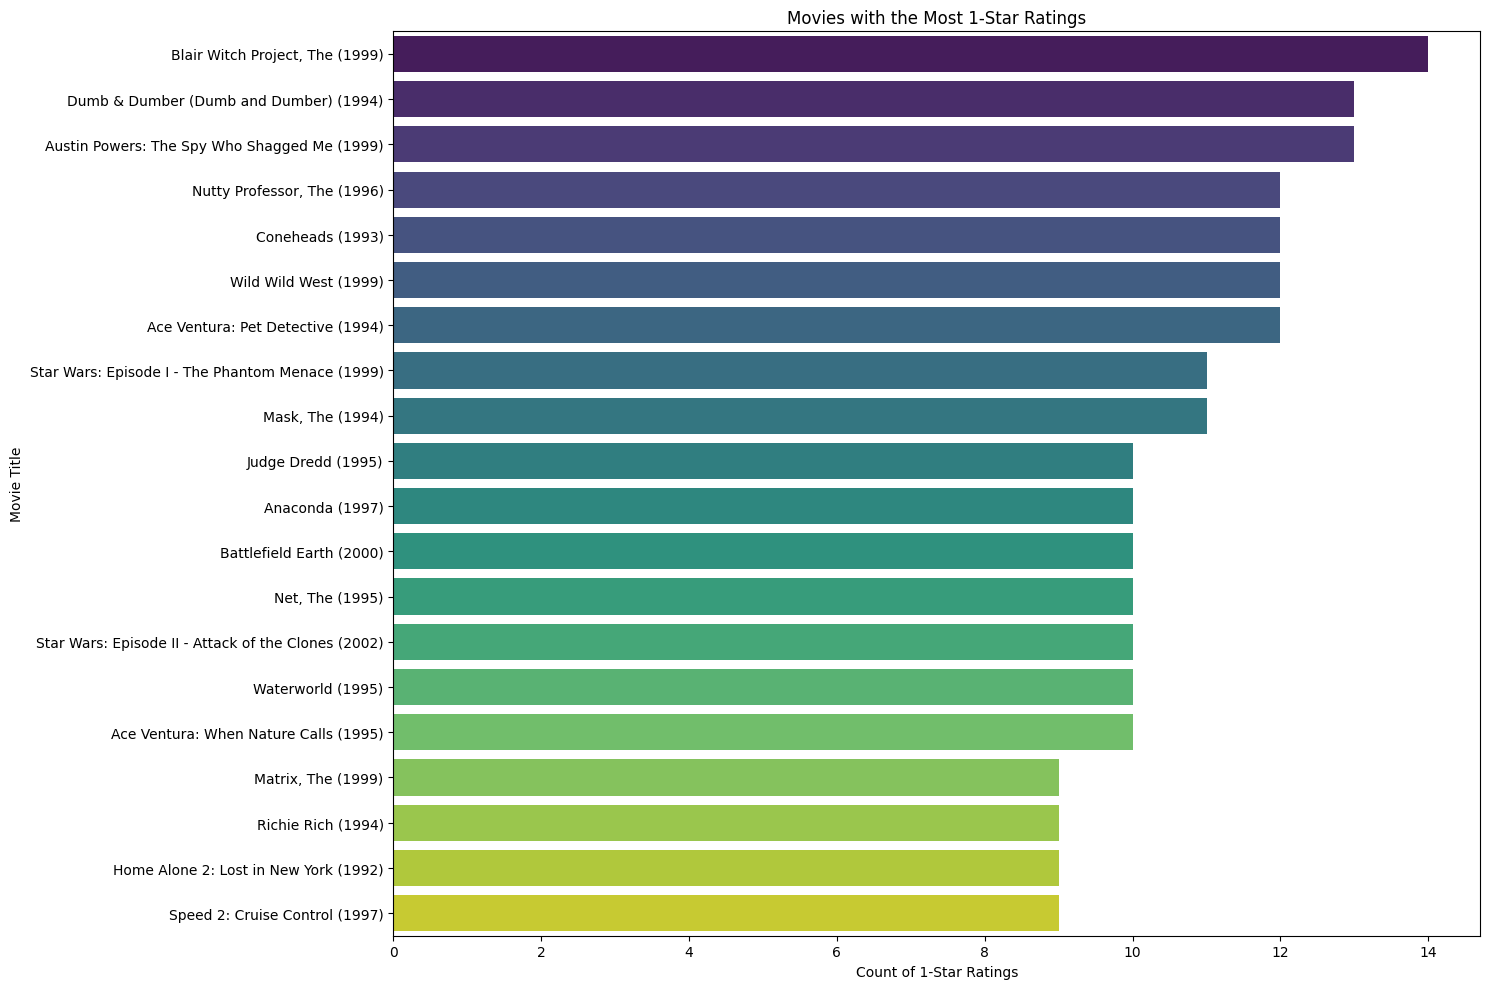

In [31]:
# Filter rows where the rating is 1
five_star_ratings = eda_df[eda_df['rating'] == 1]

# Group movies and count the occurrences of 1-star ratings
top_movies = five_star_ratings['title'].value_counts().reset_index()
top_movies.columns = ['title', 'count']

# Sort the movies by count of 5-star ratings in descending order
top_movies = top_movies.sort_values(by='count', ascending=False)

# Select the top N movies with the most 1-star ratings (e.g., top 20)
top_N_movies = top_movies.head(20)

# Create a bar plot to visualize the results
plt.figure(figsize=(15, 10))
sns.barplot(data=top_N_movies, x='count', y='title', palette='viridis')

# Add labels and title
plt.xlabel('Count of 1-Star Ratings')
plt.ylabel('Movie Title')
plt.title('Movies with the Most 1-Star Ratings')

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
df.head()

,userId,movieId,rating,timestamp,title,genres,year,month,Movie_Release_Year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000,7,1995
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,2000,7,1995
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,2000,7,1995
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2000,7,1995
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2000,7,1995


In [33]:
df=df.drop(['year','month','Movie_Release_Year'], axis = 1)
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [34]:
df['rating'] = np.ceil(eda_df['rating'])
df['rating'].value_counts()

rating
4.0    39954
3.0    25597
5.0    21762
2.0     9342
1.0     4181
Name: count, dtype: int64

In [35]:
n_items = df['movieId'].nunique()
print("Number of unique movies:", n_items)
n_users = df['userId'].nunique()
print("Number of unique records:", n_users )

Number of unique movies: 9724
Number of unique records: 610


In [36]:
is_user_id_consecutive = df['userId'].nunique() == df['userId'].max()

is_movie_id_consecutive = df['movieId'].nunique() == df['movieId'].max()

print(f"User IDs are consecutive: {is_user_id_consecutive}")
print(f"Movie IDs are consecutive: {is_movie_id_consecutive}")

User IDs are consecutive: True
Movie IDs are consecutive: False


In [37]:
min_movie_id = df['movieId'].min()

movie_id_mapping = {movie_id: i + 1 for i, movie_id in enumerate(sorted(df['movieId'].unique()))}

df['movieId'] = df['movieId'].map(movie_id_mapping)

df['userId'] = df['userId'] - df['userId'].min() + 1

consecutive_user_ids = df['userId'].is_monotonic_increasing
consecutive_movie_ids = df['movieId'].is_monotonic_increasing

print("User IDs are consecutive integers:", consecutive_user_ids)
print("Movie IDs are consecutive integers:", consecutive_movie_ids)

User IDs are consecutive integers: True
Movie IDs are consecutive integers: False


In [38]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,100836
mean,326.127564,3102.735561,3.652287,2008-03-19 17:01:27.368469248
min,1.000000,1.000000,1.000000,1996-03-29 18:36:55
25%,177.000000,901.000000,3.000000,2002-04-18 09:57:46
50%,325.000000,2253.000000,4.000000,2007-08-02 20:31:02
75%,477.000000,5096.250000,4.000000,2015-07-04 07:15:44.500000
max,610.000000,9724.000000,5.000000,2018-09-24 14:27:30
std,182.618491,2627.050983,1.045238,NaN


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

warnings.filterwarnings("ignore")

In [40]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create two user-item matrices, one for training and another for testing
n_users = df['userId'].nunique()
n_items = df['movieId'].nunique()

train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1] - 1, line[2] - 1] = line[3]

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1] - 1, line[2] - 1] = line[3]

# Calculate user and item similarity
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# Predict ratings
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

# Calculate RMSE
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.414585495302563
Item-based CF RMSE: 3.652625385442259


In [41]:
movies_df = df[['movieId', 'title']].drop_duplicates()
genres_df = df[['movieId', 'genres']].drop_duplicates()

test_data = test_data.drop(['timestamp'], axis=1)

# Evaluate recommendations for a specific user (e.g., user with userId 1)
user_id_to_evaluate = 13

# Get the user's ratings from the test data
actual_ratings = test_data[test_data['userId'] == user_id_to_evaluate]

# Sort the user's ratings to see the highest rated movies
actual_ratings.sort_values(by='rating', ascending=False, inplace=True)

# Set the maximum column width for Pandas DataFrames
pd.set_option('display.max_colwidth', 30)

# Print the top 5 rated movies by this user

print(f"\nTop 5 rated movies by User {user_id_to_evaluate}:\n")
print(actual_ratings.head().to_string(index=False, justify='left'))  # Print top-rated movies in one row

# Predict ratings for all users using item-based approach
item_prediction = predict(train_data_matrix, item_similarity, type='item')

def get_top_n_recommendations_with_genres(predictions, user_id, movies_df, genres_df, n=5):
    # Get user's predictions for the specified user_id
    user_row = predictions[user_id - 1]
    # Create a DataFrame with movieId and predicted ratings
    user_predictions_df = pd.DataFrame({'movieId': movies_df['movieId'], 'predicted_rating': user_row})
    # Merge with movies_df to get movie titles and genres
    user_predictions_df = user_predictions_df.merge(movies_df, on='movieId')
    user_predictions_df = user_predictions_df.merge(genres_df, on='movieId')
    # Sort by predicted rating in descending order
    user_predictions_df = user_predictions_df.sort_values(by='predicted_rating', ascending=False)
    # Get the top N recommendations
    top_n_recommendations = user_predictions_df.head(n)
    return top_n_recommendations

# Get the top 5 movie recommendations for the user including genres
top_recommendations_with_genres = get_top_n_recommendations_with_genres(item_prediction, user_id_to_evaluate, movies_df, genres_df)

# Merge actual and predicted ratings on movieId
merged_ratings = pd.merge(actual_ratings[['userId', 'movieId', 'rating']], top_recommendations_with_genres, on='movieId', how='right')

# Add 'predicted_rating' and 'userId' to the DataFrame
merged_ratings['userId'] = user_id_to_evaluate
merged_ratings = merged_ratings[['userId', 'movieId', 'predicted_rating', 'title', 'genres']]

# Print the merged DataFrame

print("\n(Recommendations for the same user):\n")
print(merged_ratings.to_string(index=False, justify='left'))


Top 5 rated movies by User 13:

 userId  movieId  rating title                genres                         
13      2993     5.0            Snatch (2000)           Comedy|Crime|Thriller
13      2698     4.0     Shanghai Noon (2000) Action|Adventure|Comedy|Western
13      2476     4.0       Pitch Black (2000)          Horror|Sci-Fi|Thriller
13      2904     4.0     Almost Famous (2000)                           Drama
13      3087     4.0          Hannibal (2001)                 Horror|Thriller

(Recommendations for the same user):

 userId  movieId  predicted_rating title                                  genres                          
13      7215     0.008442                  Pekka ja Pätkä Suezilla (1958)                           Comedy
13      3919     0.008439          Martin Lawrence Live: Runteldat (2002)               Comedy|Documentary
13      6402     0.008439                         Reno 911!: Miami (2007)                           Comedy
13      8891     0.008437       

In [42]:
movies_df = df[['movieId', 'title', 'genres']].drop_duplicates()
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9724 entries, 0 to 100828
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9724 non-null   int64 
 1   title    9724 non-null   object
 2   genres   9724 non-null   object
dtypes: int64(1), object(2)
memory usage: 303.9+ KB


In [44]:
pip install implicit

   ---------------------------------------- 0.0/750.8 kB ? eta -:--:--
   -- ------------------------------------ 41.0/750.8 kB 960.0 kB/s eta 0:00:01
   ---- ---------------------------------- 81.9/750.8 kB 907.3 kB/s eta 0:00:01
   ------ ------------------------------- 122.9/750.8 kB 901.1 kB/s eta 0:00:01
   ------------- -------------------------- 245.8/750.8 kB 1.4 MB/s eta 0:00:01
   ------------------------- -------------- 471.0/750.8 kB 2.1 MB/s eta 0:00:01
   --------------------------------- ------ 634.9/750.8 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 750.8/750.8 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix

In [46]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create a sparse user-item matrix for training data
sparse_user_item = pd.pivot_table(train_data, values='rating', index='userId', columns='movieId').fillna(0)

# Convert sparse_user_item to a CSR matrix
user_item_csr = csr_matrix(sparse_user_item)

# Create an ALS model
model = AlternatingLeastSquares(random_state=42,factors=40, calculate_training_loss=True,regularization=0.01, iterations=5, use_gpu=False)

# Fit the model
model.fit(user_item_csr)

100%|██████████| 5/5 [00:01<00:00,  4.71it/s, loss=0.016] 


In [47]:
def get_top_n_recommendations(user_id, model, n=5):
    # Make item recommendations for the user
    user_factors, item_factors = model.user_factors, model.item_factors
    user_vector = user_factors[user_id]
    scores = np.dot(user_vector, item_factors.T)
    
    # Apply min-max scaling to scores to have a range between 0 and 1
    min_score = scores.min()
    max_score = scores.max()
    scaled_scores = (scores - min_score) / (max_score - min_score)
    
    top_items = np.argsort(scaled_scores)[::-1][:n]

    return [(item, scaled_scores[item]) for item in top_items]

# Evaluate recommendations for a specific user (e.g., user with userId 55)
user_id_to_evaluate = 13

# Get the user's ratings from the test data
actual_ratings = test_data[test_data['userId'] == user_id_to_evaluate]

# Sort the user's ratings to see the highest rated movies
actual_ratings = actual_ratings.sort_values(by='rating', ascending=False)

# Print the top 5 rated movies by the user
print(f"\nTop 5 rated movies by User {user_id_to_evaluate}:")
for i, (_, row) in enumerate(actual_ratings.head(5).iterrows()):
    title = row['title']
    genres = row['genres']
    rating = row['rating']
    print(f"{i+1}. Movie: {title}, Genres: {genres}, Rating: {rating:.2f}")

# Get the top 5 movie recommendations for the user with scaled scores
top_recommendations = get_top_n_recommendations(user_id_to_evaluate, model, n=5)

# Assuming you have a movies_df DataFrame containing movie information
movies_df = df[['movieId', 'title', 'genres']].drop_duplicates()  # Load movie data
recommended_movie_info = movies_df[movies_df['movieId'].isin([item[0] for item in top_recommendations])]  # Filter for recommended movies

# Print the top 5 movie recommendations in the desired format with scaled scores
print(f"\nUser {user_id_to_evaluate}'s Top 5 Movie Recommendations:")
for i, (_, row) in enumerate(recommended_movie_info.iterrows()):
    title = row['title']
    genres = row['genres']
    scaled_score = top_recommendations[i][1]  # Use the scaled score
    print(f"{i+1}. Movie: {title}, Genres: {genres}, Recommendation Score: {scaled_score:.2f}")


Top 5 rated movies by User 13:
1. Movie: Snatch (2000), Genres: Comedy|Crime|Thriller, Rating: 5.00
2. Movie: Shanghai Noon (2000), Genres: Action|Adventure|Comedy|Western, Rating: 4.00
3. Movie: Pitch Black (2000), Genres: Horror|Sci-Fi|Thriller, Rating: 4.00
4. Movie: Almost Famous (2000), Genres: Drama, Rating: 4.00
5. Movie: Hannibal (2001), Genres: Horror|Thriller, Rating: 4.00

User 13's Top 5 Movie Recommendations:
1. Movie: Once Were Warriors (1994), Genres: Crime|Drama, Recommendation Score: 1.00
2. Movie: Stuart Saves His Family (1995), Genres: Comedy, Recommendation Score: 0.99
3. Movie: Little Big League (1994), Genres: Comedy|Drama, Recommendation Score: 0.98
4. Movie: Basketball Diaries, The (1995), Genres: Drama, Recommendation Score: 0.98
5. Movie: Spanking the Monkey (1994), Genres: Comedy|Drama, Recommendation Score: 0.98
